In [1]:
import pandas as pd 
import numpy as np 
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('drive', force_remount=True)

In [10]:
df = pd.read_csv('drive/My Drive/MetroVan.csv')
# Delete Dublicated rows based on zipcode
df = df.drop_duplicates(subset='ZipCode', keep="first")

# New Section

In [5]:
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features in set: {df.shape[1]}")
print("Features:", df.columns.values)
#print(df.columns.values)
Mean = df["Price"].mean()
Median = df["Price"].median()
Skewness = df["Price"].skew()
Kurtosis =df["Price"].kurtosis()
max_price=df["Price"].max()
min_price=df["Price"].min()
print(f"Min price:{min_price:,.2f}")
print(f"Max price:{max_price:,.2f}")
print(f"Mean: {Mean:,.2f}")
print(f"Median: {Median:,.2f}")
print(f"Skewness: {Skewness:.4f}")
print(f"Kurtosis: {Kurtosis:.4f}")
df["Price"].describe().apply("{0:.2f}".format)

Number of samples: 2976
Number of features in set: 11
Features: ['Unnamed: 0' 'Address' 'Town' 'ZipCode' 'Area' 'Price' 'Beds' 'Baths'
 'Broker' 'latitude' 'longitude']
Min price:99,900.00
Max price:36,968,000.00
Mean: 3,116,636.28
Median: 2,699,000.00
Skewness: 3.3934
Kurtosis: 18.1870


count        2976.00
mean      3116636.28
std       3266979.09
min         99900.00
25%        949900.00
50%       2699000.00
75%       3934750.00
max      36968000.00
Name: Price, dtype: object

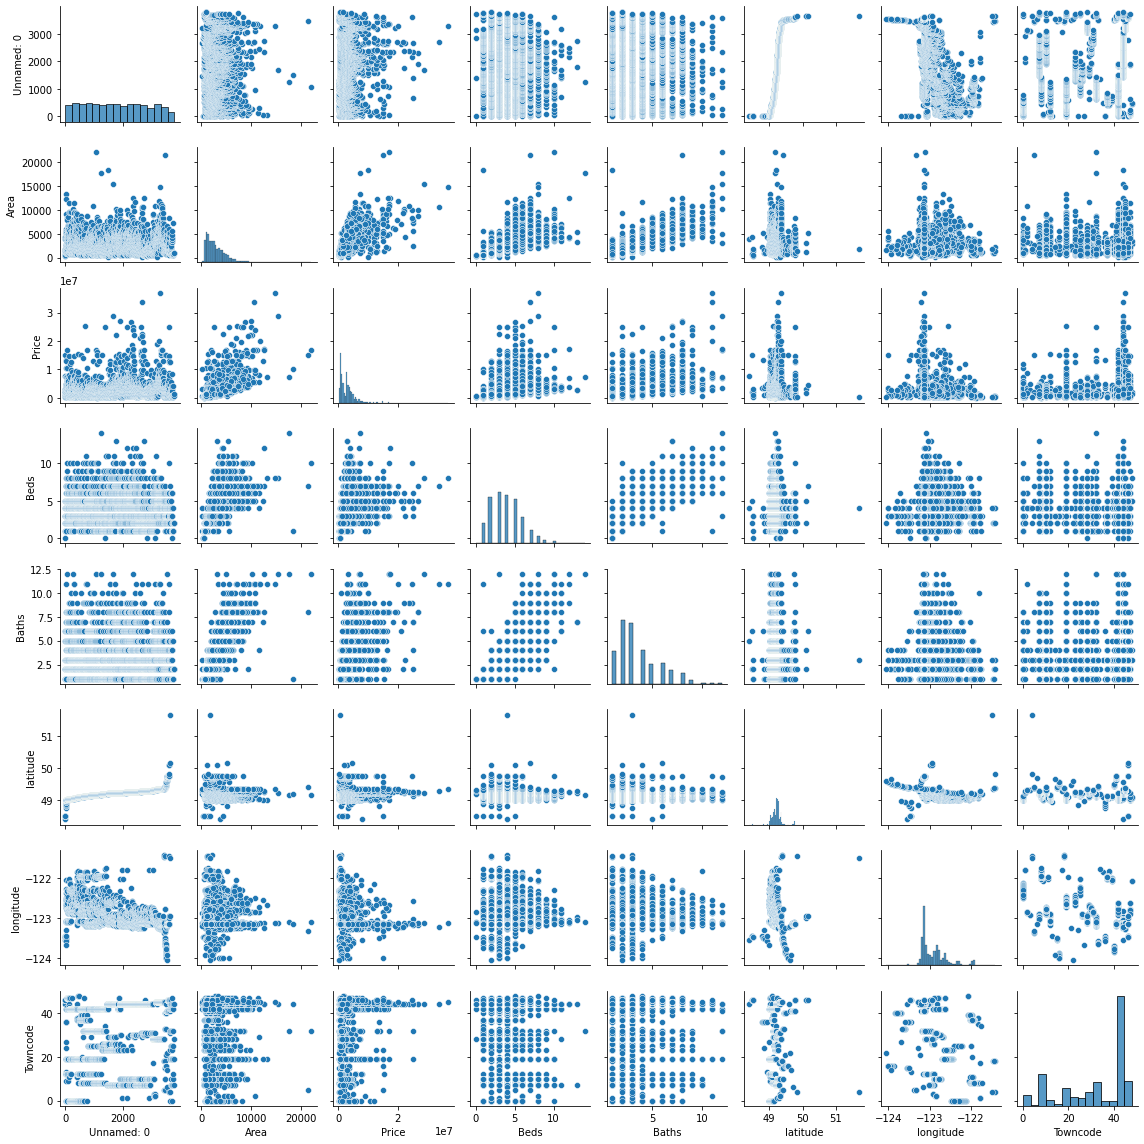

In [6]:
# Converting Town as a category attribute to numbers
df.Town = pd.Categorical(df.Town)
df['Towncode'] = df.Town.cat.codes

sns.pairplot(df, height=2)
plt.tight_layout()

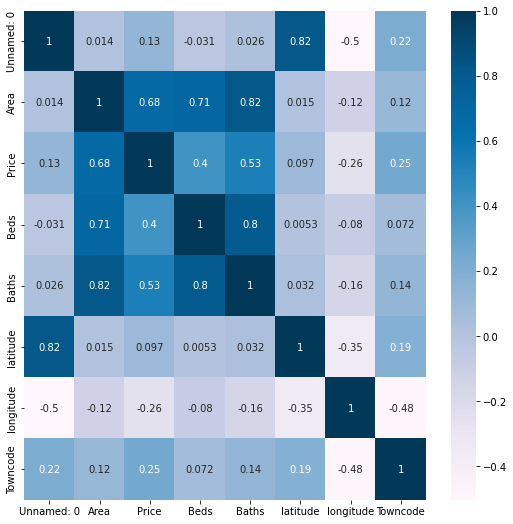

In [7]:
plt.figure(figsize=(9,9))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [8]:
# Absolute value of correlation
cor_target = abs(cor['Price']) 
# Highly correlated attributes
relevant_features = cor_target[cor_target>0.2] 
# Getting the names of the attributes
names = [index for index, value in relevant_features.iteritems()] 
# Erase the target attribute
names.remove('Price') 
# printing the correlated attributes
print(names) 
print(len(names))

['Area', 'Beds', 'Baths', 'longitude', 'Towncode']
5


In [9]:
from sklearn.model_selection import train_test_split

# Droping rows contain NaN and unrequired columns

df.dropna(inplace=True, axis=0)

x = df.drop(['Price', 'Address', 'Town', 'ZipCode', 'Broker'], axis=1)
y = df['Price']

# Dividing the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#Print Num of rows and Columns of test and training tet
print("X-Train data set :", x_train.shape)
print("X-Test data set :", x_test.shape)
print("Y-Train data set :", y_train.shape)
print("Y-Test data set :", y_test.shape)

X-Train data set : (2328, 7)
X-Test data set : (583, 7)
Y-Train data set : (2328,)
Y-Test data set : (583,)


In [11]:
from sklearn.linear_model import LinearRegression

# Instantiating the Linear Regression Object
lr = LinearRegression() 

 # Fitting the model
lr.fit(x_train, y_train)
lr.score(x, y)

0.49760930220241684

In [12]:
#Predictions of House Prices
predictions = lr.predict(x_test)

# Present Value of the House in dollars
print('Actual value of the house:- CA$', y_test[0])

# Predicted value of the House in dollars
print("Model Predicted Value:-  CA$", predictions[0]) 

Actual value of the house:- CA$ 7870000
Model Predicted Value:-  CA$ 2624602.9052149653


# To check the accuracy using Mean Squared Error and Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)

print(f'Mean Squared Error: {mse:,.2f}')
print(f'Root Mean Squared Error: {rmse:,.2f}')

Rsquared=r2_score(y_test, predictions)
print(f'R^2 Value: {Rsquared*100:,.2f} %')

In [ ]:
import matplotlib.ticker as tkr

#sns.set_theme()
plt.figure(figsize=(26,9)) # figure ration 16:9
sns.set()
# Modify histogram with bins  
graph = sns.displot(data=df, x="Price", kde=True, kind='hist', rug=True, log_scale=True, bins=55, height=8.27, aspect=11.7/8.27)
graph.set(title="Histogram of Sale Price")
for ax in graph.axes.flat:
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=30)
plt.show()

In [ ]:
from pandas._libs.hashtable import value_count
df['Broker'] = df['Broker'].str.strip()
type(df['Broker'][0])
df['Broker'].nunique()
#df['Broker'].value_counts()

In [ ]:
# Histogram top 30 Realtor
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
df['Broker'] = df['Broker'].str.strip()
graph = df['Broker'].value_counts()[:30]
graph.plot(kind='barh', fontsize=12, title="Top 30 listing-creator realtor")
plt.show()

In [ ]:
from pandas._libs.hashtable import value_count
df['Town'] = df['Town'].str.strip()
type(df['Town'][0])
print('Number of real estate per individual town in the listing: ',df['Town'].nunique(),'\n')
df['Town'].value_counts()

In [ ]:
figure(figsize=(10, 8), dpi=80)
df['Town'] = df['Town'].str.strip()
graph = df['Town'].value_counts()[:30]
graph.plot(kind='barh', fontsize=12, title="Top 30 ")
plt.show()

In [ ]:
from pandas._libs.hashtable import value_count
df1 = pd.read_csv('drive/My Drive/MetroVan.csv')

In [ ]:
figure(figsize=(10, 8), dpi=80)
df = df1[['Price', 'Town' ]]
df['binned_price'] = pd.cut(df.Price, [1, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000])
ax = df['binned_price'].value_counts().plot(kind='bar', stacked=True, ylabel='Frequency',\
                                            xlabel='Price binned',title='Price group frequency by Town', rot=90, fontsize=9)

In [ ]:
df = pd.read_csv('drive/My Drive/MetroVan.csv')
plt.rcParams.update( {'figure.figsize':(12,6), 'axes.facecolor': 'White' , 'figure.dpi':150})
plt.scatter(x=df.Price, y=df.Area, c=df.Beds, cmap='Spectral')
plt.colorbar(label="Number of Beds")
plt.title('Relationships between Price and Area')
plt.xlabel('Price (CA$)')
plt.ylabel('Property Area (Square feet)')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['axes.facecolor'] = 'black'
plt.show()